# Sample of DUE problem

## Import modules

In [1]:
import numpy as np
import pandas as pd

import BottleneckModel as bnm 

import importlib
importlib.reload(bnm)

import cvxpy as cp

import matplotlib.pyplot as plt
%matplotlib inline

## Set paramerters

In [2]:
# Set paramerters

# Number of groups
K = 3

# Total OD demand
Q = np.array([200, 200, 200])

# Bottleneck Capacity
mu = 10

# Time window
T = 100

# Delta t which is step width
dt = 1

# Create schedule delay function
# Desired departure time 
d1 = 60
f1 = np.array([abs(d1-i*dt)**2*0.02 for i in range(T)], dtype=float)
f1[:int(d1*(1/dt)):] = f1[:int(d1*(1/dt)):]*0.2 # early arrival
f1[int(d1*(1/dt))::] = f1[int(d1*(1/dt))::]*0.4 # late arrival


# Desired departure time 
d2 =40
f2 = np.array([abs(d2-i*dt)**2*0.02 for i in range(T)], dtype=float)
f2[:int(d2*(1/dt)):] = f2[:int(d2*(1/dt)):]*0.2 # early arrival
f2[int(d2*(1/dt))::] = f2[int(d2*(1/dt))::]*0.4 # late arrival


# Create schedule delay matrix
s = np.block([[f1],[f1*1.1],[f2]]).T

## Check shape of schedule delay function

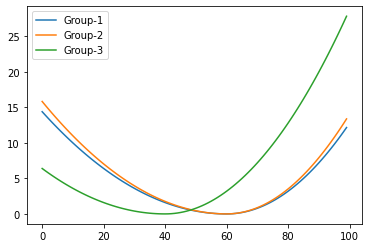

In [3]:
plt.plot(s[:,0], label='Group-1')
plt.plot(s[:,1], label='Group-2')
plt.plot(s[:,2], label='Group-3')
plt.legend()

## Available solver for cvxpy

It is recommended to use GUROBI. If the below does not have GUROBI, please install the Gurobi Python interface as described [here](https://www.gurobi.com/documentation/9.0/quickstart_mac/py_building_and_running_th.html#subsection:pythonrun) first.

In [4]:
cp.installed_solvers()

['CVXOPT', 'ECOS', 'GLPK', 'GLPK_MI', 'GUROBI', 'OSQP', 'SCS']

## Create model and solve problem

In [5]:
prm = bnm.parameter(K, Q, T, s, mu)
DUE_m = bnm.DUE_model(prm)

In [6]:
DUE_m.solve()
sol = DUE_m.solution

Academic license - for non-commercial use only - expires 2021-03-01
Using license file C:\Users\TAKALA\gurobi.lic


In [7]:
sol

{'q': array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 10.,  0.,  0.,
        10.,  0.,  0., 10.,  0.,  0., 10.,  0.,  0., 10.,  0.,  0., 10.,
         0.,  0., 10.,  0.,  0., 10.,  0.,  0., 10.,  0.,  0., 10.,  0.,
         0., 10.,  0.,  0., 10.,  0.,  0., 10.,  0.,  0., 10.,  0.,  0.,
        10.,  0.,  0., 10.,  0.,  0., 10.,  0.,  0., 10.,  0.,  0., 10.,
         0.,  0., 10., 10.,  0.,  0., 10.,  0.,  0., 10.,  0.,  0., 10.,
         0.,  0., 10.,  0.,  0., 10.,  0.,  0., 10.,  0.,  0., 10.,  0.,
         0., 10.,  0.,  0.,  0., 10.,  0.,  0., 10.,  0.,  0., 10.,  0.,
         0., 10.,  0.,  0., 10.,  0.,  0., 10.,  0.,  0., 10.,  0.,  0.,
        10.,  0.,  0., 10.,  0.,  0., 10.,  0.

## Plot figure

### Flow pattern

Text(0.5, 1.0, 'DUE arrival flow pattern')

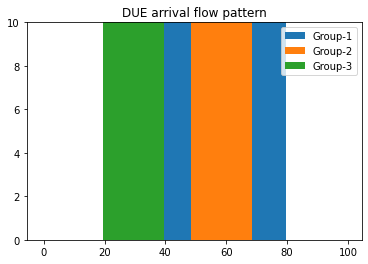

In [8]:
btm = np.zeros(prm.T)
for OD in range(prm.K):
    plt.bar(range(prm.T), sol['q'][OD::prm.K], bottom=btm, width=1, label='Group-%i'%(OD+1))
    btm = btm + sol['q'][OD::prm.K]

plt.legend()
plt.title('DUE arrival flow pattern')

### Cost pattern

Text(0.5, 1.0, 'DUE cost pattern')

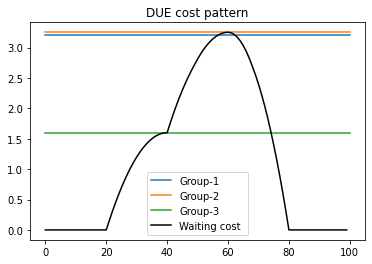

In [9]:
for OD in range(prm.K):
    tmp_rho = sol['rho'][OD]
    plt.plot([0,prm.T], [tmp_rho, tmp_rho], label='Group-%i'%(OD+1))
    

plt.plot(sol['w'], color='black', label='Waiting cost ')

plt.legend()
plt.title('DUE cost pattern')

### Cumulative flow

In [10]:
cumsum = np.zeros(prm.T)
for OD in range(prm.K):
    cumsum = cumsum + sol['q'][OD::prm.K]

curve = cumsum.cumsum()

Text(0.5, 1.0, 'Cumulative flow')

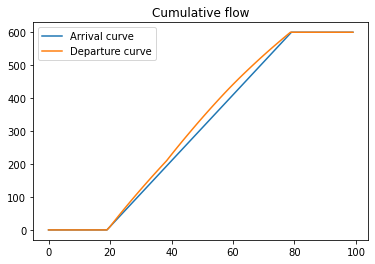

In [11]:
Time_List = np.linspace(0,prm.T-1,prm.T)
plt.plot(Time_List, curve, label='Arrival curve')
plt.plot(Time_List-sol['w'], curve, label='Departure curve')


plt.legend()
plt.title('Cumulative flow')